# Машинное обучение, ФКН ВШЭ

## Практическое домашнее задание 2. Градиентный спуск своими руками

### Общая информация

Дата выдачи: 30.09.2025

Мягкий дедлайн: 14.10.2025 23:59

Жесткий дедлайн: 18.10.2025 23:59


### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных модификаций градиентного спуска. В файле `descents.py` вам нужно будет реализовать несколько классов для различных вариаций градиентного спуска, а именно:
* `VanillaGradientDescent`
* `StochasticGradientDescent`
* `StochasticAverageGradient`
* `MomentumDescent`
* `Adam`

В файле `linear_regression.py` вам необходимо будет реализовать класс `LinearRegression` для обучения линейной регрессии (и, разумеется, предсказания целевой переменной на основе обученной модели).

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 11 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке. Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате **homework-practice-02-gd-Username.ipynb**, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

## Задание 1. Реализация градиентного спуска (4 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Напоминание про градиентный спуск

Основное свойство антиградиента &ndash; он указывает в сторону *наискорейшего* убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь $\eta_{k}$ обозначает длину шага на $k$-ой итерации (learning rate), а $Q(w)$ - функцию потерь (loss function).

### Градиент функции потерь MSE

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2025-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0.02 балла).

Напомним, что функция потерь MSE записывается как:

$$
    Q(w) = \frac{1}{\ell} \sum \limits_{i = 1}^\ell (y_i - \langle x_i, w \rangle)^2 = \frac{1}{\ell} \| X w - y \|^2
$$

где $\ell$ – количество объектов в выборке, $X \in \mathbb{R}^{\ell \times d}$ – матрица "объект-признак", а $y \in \mathbb{R}^\ell$ – целевая переменная. Через $x_i$ обозначается $i$-ая строчка матрицы $X$, отвечающая за $i$-й объект выборки.

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

**Решение:**

$ \nabla_w Q(w_k) = \frac{2}{\ell} X^T(Xw-y) $

### Задание 1.1. Learning Rate Schedules (0.03 балла)

Обратите внимание на **абстрактный** класс `LearningRateSchedule` в файле `descents.py`. С помощью него мы на каждой итерации градиентного спуска будем получать соответствующий `learning_rate` $\eta_k$.

В файле уже реализован класс `ConstantLR`, который на каждой итерации возвращает один и тот же заранее заданный шаг. Ваша задача в этом пункте – реализовать `TimeDecayLR`, который мы будем использовать для обучения линейной регрессии. Формула очередного шага должна выглядеть следующим образом:
$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

**Обратите внимание**

Все реализуемые вами классы спуска в задании - это *универсальные* оптимизаторы. Они не должны считать градиенты конкретной функции потерь внутри себя.

Для вычисления градиента они всегда обращаются к модели, с которой работают:

```
gradient = self.model.compute_gradients(X_batch, y_batch)
```

Чтобы это работало, уже на данном этапе должны быть реализованы в `linear_regression.py`:

* `compute_gradients(X, y)` для MSE (в дальнейшем, в Задании 7, сюда добавляется член L2-регуляризации),
* `compute_loss(X, y)` для MSE (аналогично с учётом L2 при необходимости).

Если идёте строго по порядку, реализуйте эти MSE-версии в начале Задания 2.1 (используя формулы из п. 1.0), а затем вернитесь к заданиям 1.2–1.6 - код оптимизаторов менять не придётся. В Задании 8 вы просто расширите обе функции под `LogCosh` и `Huber`, переключая их через `self.loss_function`.

Такой подход позволяет свободно менять функцию потерь, не переписывая алгоритмы оптимизации.

### Задание-примечание 1.1. Родительский класс BaseDescent (0 баллов).

В файле `descents.py` приведен шаблон класса `BaseDescent` – родительского класса для модификаций градиентного спуска, от которого будут наследоваться другие классы (`VanillaGradientDescent`, `StochasticGradientDescent`, `MomentumDescent` и `Adam`). Более подробно про наследование классов в Python можно прочитать
* Наследование: https://docs.python.org/3/tutorial/classes.html#inheritance
* Абстрактные классы: https://docs.python.org/3/library/abc.html

В классе `BaseDescent` **все методы уже реализованы**. Цель этого задания – внимательно ознакомиться с тем, как устроен этот класс.

Обратите внимание на атрибут `self.iteration`, отвечающий за номер итерации алгоритма спуска. Как раз с помощью него (и `self.lr_schedule`) мы и будем получать `learning_rate` на соответствующей итерации алгоритма. Функция `update_weights` должна обновлять веса модели `self.model.w`, а также возвращать величину обновления $w_{k + 1} - w_k$

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Напомним, что шаг классического градиентного спуска выглядит следующим образом:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

**Важно**: Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$. Кроме того, соответственно своему названию, она должна обновлять веса модели `model.w`.

### Напоминание про SGD (стохастических градиентный спуск)

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов, обычно называемое **батчом**.

Оценка $\frac{1}{|B|} \sum \limits_{i \in B} \nabla_w q_i(w_k)$ называется **стохастическим градиентом** функции потерь, а получившийся метод называют методом **стохастического градиентного спуска** или просто SGD.

### Задание 1.3. Стохастический градиентный спуск StochasticGradientDescent (0.7 баллов).

Реализуйте стохастический градиентный спуск, заполнив пропуски в классе `StochasticGradientDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться **гиперпараметром** метода и передаваться в конструктор класса `__init__(...)`. Семплировать индексы батча объектов $B$ можно с повторениями (через np.random.randint) - это допустимо и даёт несмещённую оценку градиента. По желанию можно без повторений (np.random.choice(..., replace=False) или через пермутацию по эпохам).

### Напоминание про метод инерции (или метод моментов)

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация (например, в случае **стохастического градиентного спуска**). Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Stochastic Average Gradient (0.45 балла)

Держим память последних индивидуальных градиентов $g_i$ по всем объектам и их среднее $\bar g = \frac{1}{\ell}\sum_i g_i$. На каждом шаге выбираем индекс(ы) $j$ (мини-батч), заново считаем $g_j^{new}(w_k)$, обновляем среднее:
$$
\bar g \leftarrow \bar g + \frac{1}{\ell}\bigl(g_j^{new} - g_j^{old}\bigr),\qquad
w_{k+1} = w_k - \eta_k, \bar g.
$$
Инициализация: $g_i=0 \Rightarrow \bar g=0$.

Так получаем шаг почти как у полного градиента, но считаем градиент лишь на одном (или нескольких) объекте за итерацию.

Реализуйте класс `SAG` в `descents.py` с хранением `grad_memory` и `avg_grad`. Подсказка: чтобы получить пер-объектный градиент, можно вызывать `compute_gradients` на срезе из одного объекта `X[j:j+1]`.


### Задание 1.5 Метод Momentum - MomentumDescent (0.8 баллов).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ являеться гиперпараметром метода, однако в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Напоминание про AdaGrad, RMSprop и Adam

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. Идея проста: мы будем "копить" сумму квадратов градиентов и делить очередной градиент на корень из этой суммы. Таким образом, обновление весов с большими градиентами будет тормозиться, а с маленькими наоборот получать большие шаги. Формула обновлени будет выглядить так:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафиксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения **(обратите внимание, что в данном домашнем задании длина шага не фиксируется)**. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций (метод инерции), а также делать адаптивную длину шага по каждому параметру (`RMSProp`). Таким образом, мы получим метод `Adam` с той лишь разницей, что в методе `Adam` дополнительно делается нормировка накопленных градиентов и квадратов градиентов для устранения смещения.

### Задание 1.6. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

Реализуйте градиентный спуск с методом Adam, заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Линейная регресия (1 балл)

### Задание 2.1. Решение методом градиентного спуска (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegressionModel**. По сути линейная регрессия будет оберткой, которая запускает обучение

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Веса модели надо обновлять внутри функции `update_weights`, она неспроста так называется
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

### Задание 2.2. Аналитическое решение (0.5 балла)

Но, как мы помним из лекции, помимо решения при помощи градиентного спуска, для ряда функций потерь можно выписать в том числе аналитическое решение. Давайте сперва вспомним, как оно выглядит для MSE. Выведите оптимальную формулу для $w$, держа в памяти формулу MSE, и дополните класс `LinearRegression`

$$\text{MSE} = \| X w - y \|^2$$
$$ w = (X^TX)^{-1}X^Ty$$

**Вопрос**: Как мы помним, у аналитического решения есть минусы, какие кстати?

**Ответ**: Долго искать обратную матрицу ($O(n^3)$), обратной матрицы может не существовать, 

Тут мы ничего специально проверять в контесте не будем

In [174]:
import numpy as np
from linear_regression import LinearRegression

num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [175]:
from sklearn.metrics import mean_squared_error as mse
import sklearn

sklearn_linreg = sklearn.linear_model.LinearRegression(fit_intercept=False)
sklearn_linreg.fit(x, y)
print("Sklearn MSE", mse(sklearn_linreg.predict(x), y))

your_linreg = LinearRegression(optimizer=None)
your_linreg.fit(x, y)
print("Your MSE", mse(your_linreg.predict(x), y))

assert abs(mse(your_linreg.predict(x), y) - mse(sklearn_linreg.predict(x), y)) < 1e-12, "Не повезло, попробуйте еще раз"

Sklearn MSE 0.08867486896655663
Your MSE 0.08867486896655662


Давайте сделаем задание немного прикольнее и изменим одну из колонок. Как мы знаем, полная мультиколлинеарность запрещает нам пользоваться аналитическим решением, но `sklearn` по какой-то причине это обходит, хмм

In [176]:
x[:, 3] = x[:, 2] + x[:, 4]

In [177]:
sklearn_linreg = sklearn.linear_model.LinearRegression(fit_intercept=False)
sklearn_linreg.fit(x, y)
print("Sklearn MSE", mse(sklearn_linreg.predict(x), y))

your_linreg = LinearRegression(optimizer=None)
your_linreg.fit(x, y)

print("Your MSE", mse(your_linreg.predict(x), y))

Sklearn MSE 0.08934446567554533
Your MSE 0.12702837376846493


Ваша задача - понять, как можно сделать так, чтобы аналитическое решение работало всегда, вне зависимости от матрицы X. Как оказывается, это можно сделать, если воспользоваться SVD разложением, в нашем случае усеченным, чтобы было проще (это не то же самое, что обычный SVD, у него другие размерности матриц, смотрите ниже). Воспользуйтесь `scipy.sparse.linalg.svds` с числом компонент 4

Выведите формулу для w и снова дополните класс `LinearRegression`

$$\text{X} = \underset{n\times m}{\mathrm{U}} \ \underset{m\times m}{\mathrm{\Sigma}} \ \underset{m\times k}{\mathrm{V^T}}$$
$$ w = v_t^TS^{-1}U^Ty$$

In [178]:
sklearn_linreg = sklearn.linear_model.LinearRegression(fit_intercept=False)
sklearn_linreg.fit(x, y)
print("Sklearn MSE", mse(sklearn_linreg.predict(x), y))

your_linreg = LinearRegression(optimizer="SVD")
your_linreg.fit(x, y)
print("Your MSE", mse(your_linreg.predict(x), y))

assert abs(mse(your_linreg.predict(x), y) - mse(sklearn_linreg.predict(x), y)) < 1e-12, "Не повезло, попробуйте еще раз"

Sklearn MSE 0.08934446567554533
Your MSE 0.08934446567554533


## Задание 3. Проверка кода (0 баллов)

Данная секция нужна для того, чтобы убедиться в правильности реализации методов спуска и класса `LinearRegression`. В начале мы сделаем небольшую локальную проверку на "адекватность" и "запускаемость" ваших моделей, после чего уже можно будет делать посылки в Яндекс Контест.

In [179]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [180]:
%autoreload 2

from descents import (
    VanillaGradientDescent,
    StochasticGradientDescent,
    SAGDescent,
    MomentumDescent,
    Adam
)

In [181]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

Проверяем код на запускаемость.

In [182]:
# Если вы реализовали не все методы спуска, то уберите лишние из списка ниже
descent_models = [
    VanillaGradientDescent,
    StochasticGradientDescent,
    SAGDescent,
    MomentumDescent,
    Adam
]

max_iter = 10
tolerance = 0
num_objects = 100
dimension = 5

for descent_model in descent_models:
    optimizer = descent_model()
    model = LinearRegression(
        optimizer=optimizer,
        tolerance=tolerance,
        max_iter=max_iter,
    )
    model.fit(x, y)
    assert len(model.loss_history) == max_iter + 1, f"Loss history failed"
    y_pred = model.predict(x)
    assert y_pred.shape == y.shape, "Prediction shape does not match target variable"

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://new.contest.yandex.ru/contests/82854/start).

Для каждой задачи из контеста вставьте ID успешной посылки и ваш ник (почту):

* **Ник/почта**:
efgolikov@edu.hse.ru

* **VanillaGradientDescent**:
145192698

* **StochasticDescent**:
145193205

* **SAGDescent**:
145193269

* **MomentumDescent**:
145193297

* **Adam**:
145194944

* **LinearRegression**:
145193421

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте (и напишите): какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте (и напишите): какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [183]:
import numpy as np
import pandas as pd  # при желании, можете заменить на polars/pyspark или что угодно, что вам нравится

import matplotlib.pyplot as plt
import seaborn as sns

from descents import (
    ConstantLR, TimeDecayLR,
    VanillaGradientDescent, StochasticGradientDescent,
    MomentumDescent, Adam, SAGDescent
)
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [184]:
data = pd.read_csv('autos.csv')  # разумеется, если вы используете не pandas, это надо поменять

In [185]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241190 entries, 0 to 241189
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   brand              241190 non-null  object
 1   model              241190 non-null  object
 2   vehicleType        241190 non-null  object
 3   gearbox            241190 non-null  object
 4   fuelType           241190 non-null  object
 5   notRepairedDamage  241190 non-null  object
 6   powerPS            241190 non-null  int64 
 7   kilometer          241190 non-null  int64 
 8   autoAgeMonths      241190 non-null  int64 
 9   price              241190 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 18.4+ MB


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

Разделите признаки на категориальные, числовые и ... все остальное

In [187]:
from tabulate import tabulate
def columnValues(df):
    row = [df.nunique(), (df == 0).sum(axis=0), df.isna().sum(), round(df.isna().sum() / len(df) * 100, 1), df.dtypes]
    return row

df = []
for column in data:
    df.append([column] + columnValues(data[column]))

print(tabulate(df, headers=['Column', 'Count Unique', 'Count Zeros', 'Count NaNs', 'data type'], tablefmt='orgtbl'))

|                   |   Column |   Count Unique |   Count Zeros |   Count NaNs | data type   |
|-------------------+----------+----------------+---------------+--------------+-------------|
| brand             |       38 |              0 |             0 |            0 | object      |
| model             |      249 |              0 |             0 |            0 | object      |
| vehicleType       |        8 |              0 |             0 |            0 | object      |
| gearbox           |        2 |              0 |             0 |            0 | object      |
| fuelType          |        7 |              0 |             0 |            0 | object      |
| notRepairedDamage |        2 |              0 |             0 |            0 | object      |
| powerPS           |      406 |              0 |             0 |            0 | int64       |
| kilometer         |       13 |              0 |             0 |            0 | int64       |
| autoAgeMonths     |      594 |              0 | 

Проверим совпадают ли модели у разных брендов, если нет - поле model уже содержит информацию о brand и его можно удалить так как модель слабая

In [188]:
dup = data.groupby("model")["brand"].nunique()
dup[dup > 1]

model
1_reihe        2
3_reihe        2
5_reihe        2
andere        38
defender       2
discovery      2
freelander     2
grand          3
matiz          2
Name: brand, dtype: int64

Повторяются - оставим оба поля, но склеим их в 'model|brand'

In [189]:
data['brand_model'] = data['brand'].astype(str) + '|' + data['model'].astype(str)
data.drop(['brand', 'model'], axis=1, inplace=True)
data.head()

,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price,brand_model
0,kleinwagen,manuell,benzin,nein,75,150000,177,1500,volkswagen|golf
1,kleinwagen,manuell,diesel,nein,69,90000,93,3600,skoda|fabia
2,limousine,manuell,benzin,ja,102,150000,246,650,bmw|3er
3,cabrio,manuell,benzin,nein,109,150000,140,2200,peugeot|2_reihe
4,limousine,manuell,benzin,nein,105,150000,136,2000,mazda|3_reihe


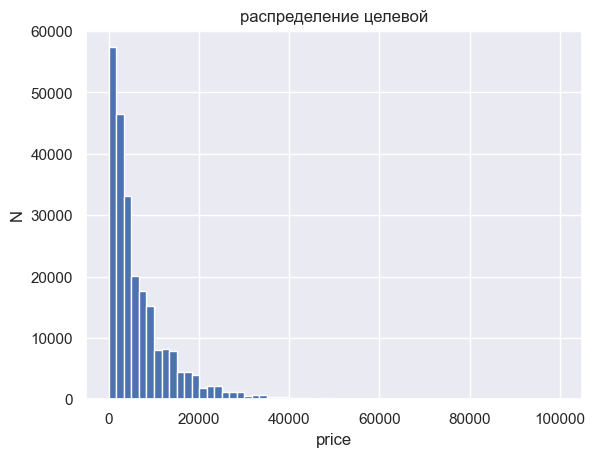

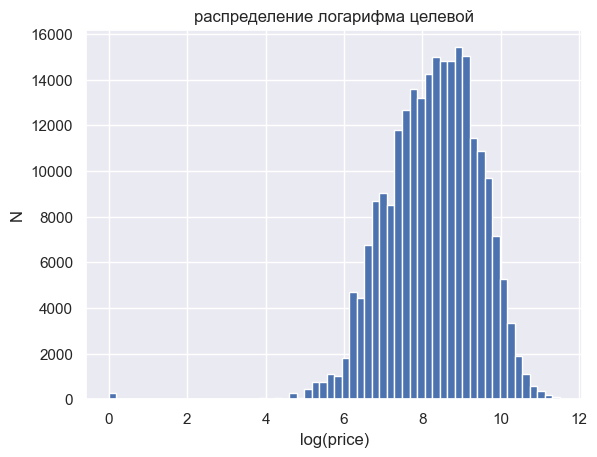

хвост price: 3.0514272240505105
хвост log(price): -0.6130920430890535
Вывод: Логарифмирование уместно


In [190]:
plt.figure()
data['price'].plot(kind='hist', bins=60)
plt.title('распределение целевой')
plt.xlabel('price')
plt.ylabel('N')

plt.figure()
np.log(data['price']).plot(kind='hist', bins=60)
plt.title('распределение логарифма целевой')
plt.xlabel('log(price)')
plt.ylabel('N')
plt.show()

print('хвост price:', data['price'].skew())
print('хвост log(price):', np.log(data['price']).skew())
print('Вывод: Логарифмирование уместно')

In [191]:
data['price'].describe()

count    241190.000000
mean       6887.741892
std        8024.451993
min           1.000000
25%        1750.000000
50%        4100.000000
75%        8999.000000
max       99999.000000
Name: price, dtype: float64

При средней цене в €6800, имеем цены в €1 и €10^5 за машину - аномалии

In [192]:
p_low, p_high = data['price'].quantile([0.025, 0.975])
df = data[(data['price'] >= p_low) & (data['price'] <= p_high)].copy()
df['price'].describe()

count    229265.000000
mean       6203.770218
std        5806.685448
min         450.000000
25%        1850.000000
50%        4100.000000
75%        8700.000000
max       28000.000000
Name: price, dtype: float64

Аномально большие значения ушли, но мы всё еще имеем низкую цену для машины - €450, однако 25% тоже маленький - €1850, возможно продавали сломанные машины или запчасти - оставим 

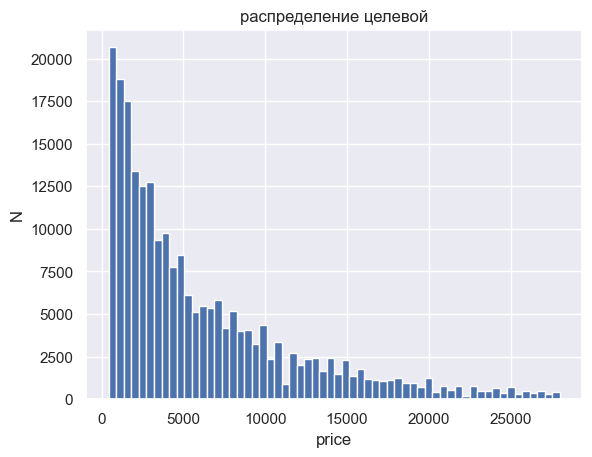

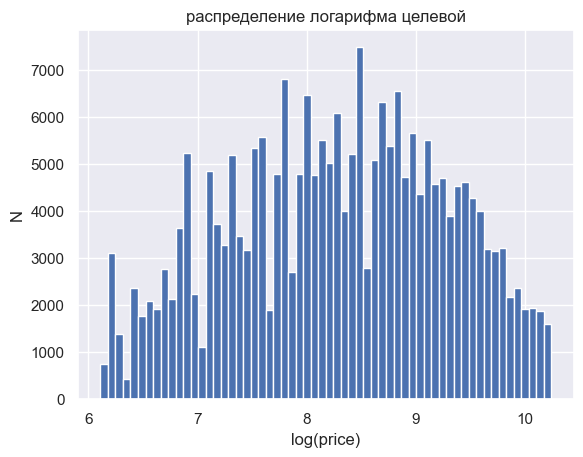

хвост price: 1.4636613856711242
хвост log(price): -0.14606598091398676


In [193]:
plt.figure()
df['price'].plot(kind='hist', bins=60)
plt.title('распределение целевой')
plt.xlabel('price')
plt.ylabel('N')

plt.figure()
np.log(df['price']).plot(kind='hist', bins=60)
plt.title('распределение логарифма целевой')
plt.xlabel('log(price)')
plt.ylabel('N')
plt.show()

print('хвост price:', df['price'].skew())
print('хвост log(price):', np.log(df['price']).skew())

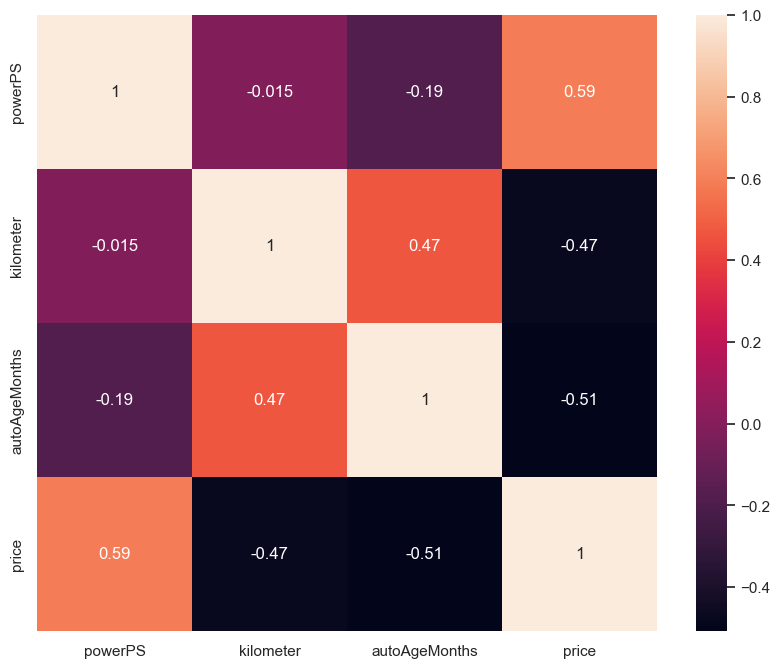

In [194]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True,)
plt.show()

In [195]:
categorical = ['brand_model', 'vehicleType', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []

Добавляем в данные единичную колонку `bias`, чтобы не делать отдельные параметр $b$ для свободного члена модели.

In [196]:
df['bias'] = 1
other += ['bias']

x = df[categorical + numeric + other]
y = df['price']

А также сделаем базовую обработку данных, а именно:
* Применим `OneHotEncoding` к категориальным признакам
* Стандартизуем численные признаки с помощью `StandardScaler`
* Остальные признаки трогать не будем, т.к. с ними непонятно что делать

In [197]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

Теперь вам необходимо разбить данные на обучающую, тестовую и валидационную выборки:

In [198]:
# YOUR CODE (data split into train/val/test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

## Задание 5. Сравнение методов градиентного спуска (1.5 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (0.75 балла)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [199]:
from descents import TimeDecayLR
from sklearn.metrics import r2_score


def train_for_lambda(opt_class, lambd, X_train, X_test, y_train, y_test):
    optimizer = opt_class(lr_schedule=lambda: TimeDecayLR(lambda_=lambd))
    model = LinearRegression(optimizer=optimizer, max_iter=500)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    mse_train = model.compute_loss(X_train, y_train)
    mse_test = model.compute_loss(X_test, y_test)
    
    r2_train = -1
    r2_test = -1
    
    try: r2_train = r2_score(y_train, y_train_pred)
    except: pass
    try: r2_test = r2_score(y_test, y_test_pred)
    except: pass
        
    
    return {
        'lambda_': lambd,
        'train_rmse': np.sqrt(mse_train),
        'test_rmse': np.sqrt(mse_test),
        'train_r2': r2_train,
        'test_r2': r2_test,
        'iters': len(model.loss_history) - 1,
    }

In [200]:
#на всякий
from descents import (
    VanillaGradientDescent,
    StochasticGradientDescent,
    SAGDescent,
    MomentumDescent,
    Adam
)

descent_models = [
    VanillaGradientDescent,
    StochasticGradientDescent,
    SAGDescent,
    MomentumDescent,
    Adam
]

In [201]:
lbd_grid = np.logspace(-3, -2, 7)
best = {}
for opt in descent_models:
    runs = [train_for_lambda(opt, lbd, X_train, X_test, y_train, y_test) for lbd in lbd_grid]
    df_runs = pd.DataFrame([{k: v for k, v in r.items()} for r in runs])
    best_idx = np.argmax([r['test_r2'] for r in runs])
    best[opt.__name__] = runs[best_idx]


In [202]:
for d in best:
    print(f'Лучшая лямбда для {d}: {round(best[d]['lambda_'], 3)}, с R2 = {round(best[d]['test_r2'], 3)}')

Лучшая лямбда для VanillaGradientDescent: 0.01, с R2 = 0.565
Лучшая лямбда для StochasticGradientDescent: 0.01, с R2 = 0.556
Лучшая лямбда для SAGDescent: 0.01, с R2 = -1.131
Лучшая лямбда для MomentumDescent: 0.01, с R2 = 0.679
Лучшая лямбда для Adam: 0.01, с R2 = -1.137


### Задание 5.2. Сравнение методов (0.75 балла)

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

In [203]:
import plotly.express as px #извините, она слишком красивая и удобная

records = []
for DescentClass in descent_models:
    method = DescentClass.__name__
    lr = best[method]['lambda_']

    optimizer = DescentClass(lr_schedule=lambda: TimeDecayLR(lambda_=lr))
    model = LinearRegression(optimizer=optimizer)
    model.fit(X_train, y_train)

    hist = model.loss_history
    records.extend({'method': method, 'iter': i, 'mse': v, 'lambda_': lr}
                   for i, v in enumerate(hist))

df = pd.DataFrame.from_records(records)

fig = px.line(
    df, x='iter', y='mse', color='method',
    title='Сходимость на сетке 0.001 -> 0.01'
)
fig.update_layout(template='plotly_white', legend_title_text='Метод')
fig.update_yaxes(type='log')
fig.show()


#### Попробуем взять сетку побольше

In [204]:
descent_models = [
    VanillaGradientDescent,
    StochasticGradientDescent,
    SAGDescent,
    MomentumDescent,
    Adam
]

In [205]:
lbd_grid = np.logspace(-2, -0.6, 6)
best = {}
for opt in descent_models:
    runs = [train_for_lambda(opt, lbd, X_train, X_test, y_train, y_test) for lbd in lbd_grid]
    df_runs = pd.DataFrame([{k: v for k, v in r.items()} for r in runs])
    best_idx = np.argmax([r['test_r2'] for r in runs])
    best[opt.__name__] = runs[best_idx]


In [206]:
for d in best:
    print(f'Лучшая лямбда для {d}: {round(best[d]['lambda_'], 3)}, с R2 = {round(best[d]['test_r2'], 3)}')

Лучшая лямбда для VanillaGradientDescent: 0.251, с R2 = 0.69
Лучшая лямбда для StochasticGradientDescent: 0.069, с R2 = 0.663
Лучшая лямбда для SAGDescent: 0.251, с R2 = -0.98
Лучшая лямбда для MomentumDescent: 0.251, с R2 = 0.72
Лучшая лямбда для Adam: 0.251, с R2 = -1.112


In [207]:
records = []
for DescentClass in descent_models:
    method = DescentClass.__name__
    lr = best[method]['lambda_']

    optimizer = DescentClass(lr_schedule=lambda: TimeDecayLR(lambda_=lr))
    model = LinearRegression(optimizer=optimizer)
    model.fit(X_train, y_train)

    hist = model.loss_history
    records.extend({'method': method, 'iter': i, 'mse': v, 'lambda_': lr}
                   for i, v in enumerate(hist))

df = pd.DataFrame.from_records(records)

In [208]:
fig = px.line(
    df, x='iter', y='mse', color='method',
    title='Сходимость на сетке 0.01 -> 0.25'
)
fig.update_layout(template='plotly_white', legend_title_text='Метод')
fig.update_yaxes(type='log')
fig.show()

Уже лучше, но Adam и SAG очень маленькие в начале, а после lr сильно режется, что не дает сойтись. <br>
Давайте посмотрим отдельно на них с константным lr 

In [209]:
descent_models = [
    # VanillaGradientDescent,
    # StochasticGradientDescent,
    SAGDescent,
    # MomentumDescent,
    Adam
]

In [210]:
from descents import TimeDecayLR
from sklearn.metrics import r2_score


def train_for_lambda(opt_class, lambd, X_train, X_test, y_train, y_test):
    optimizer = opt_class(lr_schedule=lambda: ConstantLR(lr=lambd))
    model = LinearRegression(optimizer=optimizer, max_iter=500)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    mse_train = model.compute_loss(X_train, y_train)
    mse_test = model.compute_loss(X_test, y_test)
    
    r2_train = -1
    r2_test = -1
    
    try: r2_train = r2_score(y_train, y_train_pred)
    except: pass
    try: r2_test = r2_score(y_test, y_test_pred)
    except: pass
        
    
    return {
        'lambda_': lambd,
        'train_rmse': np.sqrt(mse_train),
        'test_rmse': np.sqrt(mse_test),
        'train_r2': r2_train,
        'test_r2': r2_test,
        'iters': len(model.loss_history) - 1,
    }

In [211]:
lbd_grid = np.logspace(-1, 2.5, 15)
best = {}
for opt in descent_models:
    runs = [train_for_lambda(opt, lbd, X_train, X_test, y_train, y_test) for lbd in lbd_grid]
    df_runs = pd.DataFrame([{k: v for k, v in r.items()} for r in runs])
    best_idx = np.argmax([r['test_r2'] for r in runs])
    best[opt.__name__] = runs[best_idx]


In [212]:
for d in best:
    print(f'Лучшая лямбда для {d}: {round(best[d]['lambda_'], 3)}, с R2 = {round(best[d]['test_r2'], 3)}')

Лучшая лямбда для SAGDescent: 0.316, с R2 = 0.475
Лучшая лямбда для Adam: 56.234, с R2 = 0.745


In [213]:
records = []
for DescentClass in descent_models:
    method = DescentClass.__name__
    lr = best[method]['lambda_']

    optimizer = DescentClass(lr_schedule=lambda: ConstantLR(lr=lr))
    model = LinearRegression(optimizer=optimizer, max_iter=5000)
    model.fit(X_train, y_train)

    hist = model.loss_history
    records.extend({'method': method, 'iter': i, 'mse': v, 'lambda_': lr}
                   for i, v in enumerate(hist))

df = pd.DataFrame.from_records(records)

In [214]:
fig = px.line(
    df, x='iter', y='mse', color='method',
    title='Сходимость c ConstLR на сетке 0.1 -> 316'
)
fig.update_layout(template='plotly_white', legend_title_text='Метод')
fig.update_yaxes(type='log')
fig.show()

Заметно, что Adam сошелся (по критериям Останова из задачи)

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска.

* Сделайте по несколько запусков (например, $k = 10$) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча. _(под сходимостью понимается достижение критерия останова)_
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [215]:
import time

rows = []
records = []
for b in (1, 2, 4, 8, 16):
    iters_list, time_list, losses = [], [], []
    for t in range(10):
        np.random.seed(42 + 1000*b + t)
        opt = StochasticGradientDescent(lr_schedule=lambda: TimeDecayLR(lambda_=0.1), batch_size=b)
        model = LinearRegression(optimizer=opt, max_iter=200)
        t0 = time.perf_counter()
        model.fit(X_train, y_train)
        elapsed = time.perf_counter() - t0
        steps = len(model.loss_history) - 1
        iters_list.append(steps)
        time_list.append(elapsed)
        
        losses.append(model.loss_history)
    L = min(map(len, losses))
    stack = np.vstack([np.asarray(e)[:L] for e in losses])
    hist = stack.mean(axis=0)
    records.extend({'batch_size': b, 'iter': i, 'mse': v}
               for i, v in enumerate(hist))

    rows.append({'batch_size': b,
                 'mean_iters': float(np.mean(iters_list)),
                 'mean_time_sec': float(np.mean(time_list))})
df_mse = pd.DataFrame.from_records(records)

res_df = pd.DataFrame(rows).sort_values('batch_size').reset_index(drop=True)

In [216]:
import plotly.express as px
fig1 = px.line(res_df, x='batch_size', y='mean_iters', markers=True, log_x=True, title='SGD: шаги до сходимости vs размер батча (с max_limit=200)')
fig2 = px.line(res_df, x='batch_size', y='mean_time_sec', markers=True, log_x=True, title='SGD: время до сходимости vs размер батча')
fig1.update_layout(template='plotly_white')
fig2.update_layout(template='plotly_white')

fig1.show()
fig2.show()

Немного не корректные критерии останова по условию, поэтому SGD не останавливается даже при 2000 итерациях. Не хватает нормы градиента

In [217]:
fig = px.line(
    df_mse, x='iter', y='mse', color='batch_size',
    title='Средняя (по 10 тестам) сходимость в зависимости от размера батча'
)
fig.update_layout(template='plotly_white', legend_title_text='Метод')
fig.update_yaxes(type='log')
fig.show()

**Вывод**  Стоит оговориться, что мне пришлось добавить новый критерий останова (если ошибка перестает падать), иначе спуск не останавливался даже если ошибка совсем не менялась.

Чем больше берем размер батча - тем плавнее и быстрее сходится спуск. Минмальное среднее время сходимости при батче 8 (я тестировал и 32 и далее вполть до 256, однако они все почти повторяют гладкую форму как при batch_size=16)

А также батч с минимальным средним количеством итераций (когда выполнился критерий останова) - 2 

## Задание 7. Регуляризация (0.5 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация – это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать $L_2$-регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 5 графиков).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [218]:
from linear_regression import LossFunction


def train_for_lambda_mu(opt_class, lambd, mu, X_train, X_test, y_train, y_test):
    optimizer = opt_class(lr_schedule=lambda: TimeDecayLR(lambda_=lambd))
    model = LinearRegression(optimizer=optimizer, regularization=mu, loss_function=LossFunction.MSE_regularized, max_iter=250)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    mse_train = model.compute_loss(X_train, y_train)
    mse_test = model.compute_loss(X_test, y_test)
    
    r2_train = -1
    r2_test = -1
    
    try: r2_train = r2_score(y_train, y_train_pred)
    except: pass
    try: r2_test = r2_score(y_test, y_test_pred)
    except: pass
        
    
    return {
        'optimizer': opt_class.__name__,
        'lambda_': lambd,
        'mu': mu,
        'train_rmse': np.sqrt(mse_train),
        'test_rmse': np.sqrt(mse_test),
        'train_r2': r2_train,
        'test_r2': r2_test,
        'iters': len(model.loss_history) - 1,
    }

In [223]:
descent_models = [
    VanillaGradientDescent,
    StochasticGradientDescent,
    SAGDescent,
    MomentumDescent,
    Adam
]

In [224]:
grid_la = np.logspace(-2, 0.5, 6, endpoint=False)
grid_mu = np.logspace(-2, 0.5, 6, endpoint=False)

records = []
for opt in descent_models:
    for mu in grid_mu:
        for lbd in grid_la:
            rec = train_for_lambda_mu(opt, lbd, mu, X_train, X_test, y_train, y_test)
            records.append(rec)

df_all = pd.DataFrame(records)

In [225]:
idx = df_all.groupby('optimizer')['test_rmse'].idxmin()
df_best = df_all.loc[idx].sort_values('test_rmse').reset_index(drop=True)

In [232]:
df_best[['optimizer', 'lambda_', 'mu', 'test_r2']]

,optimizer,lambda_,mu,test_r2
0,MomentumDescent,1.211528,0.010000,0.715327
1,VanillaGradientDescent,1.211528,0.010000,0.702647
2,StochasticGradientDescent,0.068129,0.026102,0.654271
3,SAGDescent,1.211528,1.211528,-0.842158
4,Adam,1.211528,0.010000,-1.054741


In [228]:
records = []
best = {
    'MomentumDescent': {'lambda_': 0.3, 'mu': 0.01}, # пришлось порезать, чтобы ошибка не взрывалась до триллионов
    'VanillaGradientDescent': {'lambda_': 0.2, 'mu': 0.01}, # пришлось порезать, чтобы ошибка не взрывалась до триллионов
    'StochasticGradientDescent': {'lambda_': 0.177828, 'mu': 0.01},
    'SAGDescent': {'lambda_': 100, 'mu': 0.026102},  # пришлось увеличить, не обучался, но прикольно себя повел
    'Adam': {'lambda_': 100, 'mu': 0.01}  # пришлось увеличить, а то Адам сильно режет lr и не обучается (лучше конечно константный для него, но задание не позволяет)
}

for DescentClass in descent_models:
    method = DescentClass.__name__
    lr = best[method]['lambda_']
    mu = best[method]['mu']

    optimizer = DescentClass(lr_schedule=lambda: TimeDecayLR(lambda_=lr))
    model = LinearRegression(optimizer=optimizer, regularization=mu, loss_function=LossFunction.MSE_regularized)
    model.fit(X_train, y_train)

    hist = model.loss_history
    records.extend({'method': method, 'iter': i, 'mse': v, 'lambda_': lr}
                   for i, v in enumerate(hist))

df = pd.DataFrame.from_records(records)

fig = px.line(
    df, x='iter', y='mse', color='method',
    title='Сходимость для лучших lam и mu'
)
fig.update_layout(template='plotly_white', legend_title_text='Метод')
fig.update_yaxes(type='log')
fig.show()


**Общий вывод**
Получилось очень даже неплохо. Возможно стоило лучше скейлить данные так как некоторые спуски взрывались, и очень много нерв на это было потрачено

А еще когда всё жестко ломается - понимаешь, зачем на самом деле нужен git - урок на будующее, жаль нерв не вернуть.

По заданию кажется всё прошло плюс минус гладко: подобрали оптимальные параметы, где нужно там сям подсказали новые зависимости моделькам